# Capstone Part Four |  Interpreting Results | Gino Sacco

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler

In [2]:
## Load up the model

model = joblib.load('data/capstone/xgb_model.pkl')
model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=2500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [29]:
## Load up 2018 data with predictions

df_2018 = pd.read_csv('data/capstone/NFL2018.csv')
df_2018.sample(10)

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions,correct_pred
14675,2018-10-28,2018102808,IND,OAK,0,0,3.0,12,694.0,4,...,-7.0,0,0,3.0,2.0,1,1,0,0,1
7485,2018-09-30,2018093011,NO,NYG,1,0,85.0,5,649.0,2,...,-4.0,1,0,3.0,3.0,0,0,1,1,1
27228,2018-12-09,2018120912,DAL,PHI,0,1,5.0,11,629.0,3,...,6.0,1,0,3.0,3.0,1,1,1,0,0
9741,2018-10-07,2018100712,DAL,HOU,1,0,66.0,24,530.0,5,...,0.0,0,0,2.0,2.0,0,0,0,0,1
18075,2018-11-11,2018111110,SEA,LAR,0,0,26.0,12,302.0,3,...,-6.0,0,0,3.0,2.0,1,0,0,0,1
15549,2018-11-04,2018110403,CLE,KC,1,1,75.0,1,895.0,1,...,0.0,0,0,3.0,3.0,0,0,1,0,0
27856,2018-12-15,2018121501,CLE,DEN,1,0,79.0,14,859.0,3,...,0.0,0,0,3.0,3.0,0,0,0,0,1
14983,2018-10-28,2018102811,NO,MIN,1,0,67.0,5,713.0,2,...,-6.0,1,0,3.0,2.0,0,0,1,1,1
491,2018-09-09,2018090906,NO,TB,1,1,66.0,21,292.0,4,...,-15.0,1,0,1.0,2.0,0,0,1,1,1
24356,2018-12-02,2018120204,HOU,CLE,0,1,41.0,8,315.0,2,...,16.0,1,0,3.0,3.0,0,0,1,1,1


In [30]:
## Load up 2018 data with predictions

df_2019 = pd.read_csv('data/capstone/NFL2019.csv')
df_2019.sample(10)

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions,correct_pred
20912,2019-11-24,2019112400,ATL,TB,1,1,75.0,25,186.0,4,...,-19.0,1,0,0.0,2.0,0,0,1,1,1
16639,2019-11-04,2019110400,NYG,DAL,0,1,12.0,8,261.0,2,...,6.0,0,0,3.0,3.0,1,1,1,0,0
29451,2019-12-22,2019122200,DET,DEN,1,0,81.0,18,152.0,4,...,-10.0,1,1,2.0,1.0,0,0,0,1,0
29544,2019-12-22,2019122213,ARI,SEA,0,0,37.0,20,175.0,3,...,13.0,1,0,3.0,3.0,0,0,0,0,1
25592,2019-12-08,2019120811,KC,NE,0,0,50.0,10,242.0,2,...,10.0,1,0,1.0,3.0,0,0,1,1,1
15275,2019-11-03,2019110305,PHI,CHI,0,1,47.0,6,534.0,2,...,6.0,1,0,3.0,1.0,0,0,0,1,0
30798,2019-12-29,2019122902,CAR,NO,1,1,75.0,21,264.0,3,...,-39.0,1,0,3.0,2.0,0,0,1,1,1
2583,2019-09-15,2019091506,NYG,BUF,1,1,70.0,3,585.0,1,...,7.0,1,0,3.0,3.0,0,0,1,1,1
16227,2019-11-03,2019110307,DET,OAK,1,0,58.0,19,88.0,4,...,-7.0,1,0,2.0,2.0,0,0,1,1,1
26003,2019-12-12,2019121200,NYJ,BAL,1,0,74.0,16,302.0,3,...,-21.0,1,0,3.0,3.0,0,0,1,1,1


In [5]:
## Check the distribution of our data

freq1 = df_2018['play_type'].mean()
freq2 = df_2019['play_type'].mean()
print(f'Passing frequency in the 2018 season was {freq1}')
print(f'Passing frequency in the 2019 season was {freq2}')

Passing frequency in the 2018 season was 0.5935932203389831
Passing frequency in the 2019 season was 0.5936200156372166


Somewhat suprising the distribution between these 2 seasons were extremely consistent with passing occuring 59.36% vs 40.64% running plays

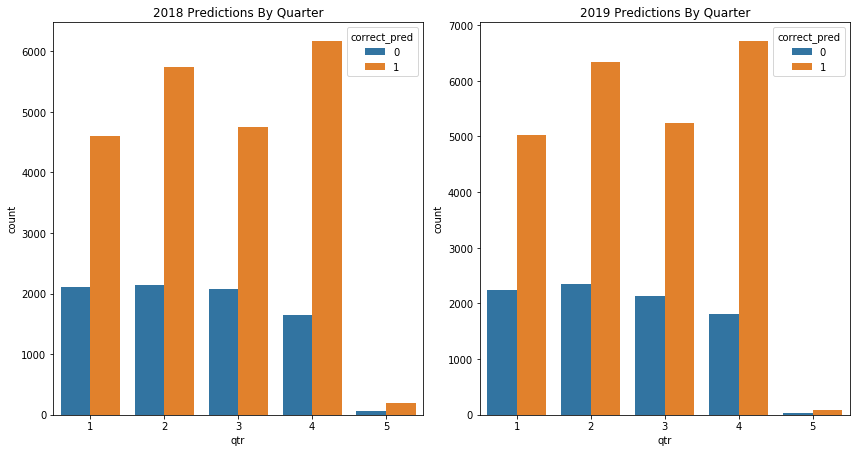

2018 Accuracy by qtr
1    0.686447
2    0.728472
3    0.695295
4    0.788518
5    0.765152
Name: correct_pred, dtype: float64
2019 Accuracy by qtr
1    0.690869
2    0.729219
3    0.710491
4    0.787701
5    0.677966
Name: correct_pred, dtype: float64


In [6]:
## Plot the 2018 predictions by Quarter

df_qtr_2018 = df_2018.groupby(['qtr']).correct_pred.value_counts()

df_qtr_2018 = pd.DataFrame(df_qtr_2018)
df_qtr_2018.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_qtr_2018.reset_index(inplace=True)

## plot the 2019 prediction by Quarter

df_qtr_2019 = df_2019.groupby(['qtr']).correct_pred.value_counts()

df_qtr_2019 = pd.DataFrame(df_qtr_2019)
df_qtr_2019.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_qtr_2019.reset_index(inplace=True)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('2018 Predictions By Quarter')
qtr_2018 = sns.barplot(x='qtr', y= 'count', data=df_qtr_2018, hue='correct_pred')

plt.subplot(2,2,2)
plt.title('2019 Predictions By Quarter')
sns.barplot(x='qtr', y= 'count', data=df_qtr_2019, hue='correct_pred')

plt.tight_layout()
plt.show()

print('2018 Accuracy by', df_2018.groupby(['qtr']).correct_pred.mean())
print('2019 Accuracy by', df_2019.groupby(['qtr']).correct_pred.mean())

1 indicates correct predictions and 0 indicates incorrect predictions. Fairly consistent results accros the quarters. 5th quarter indicates overtime which is relatively rare in the NFL.

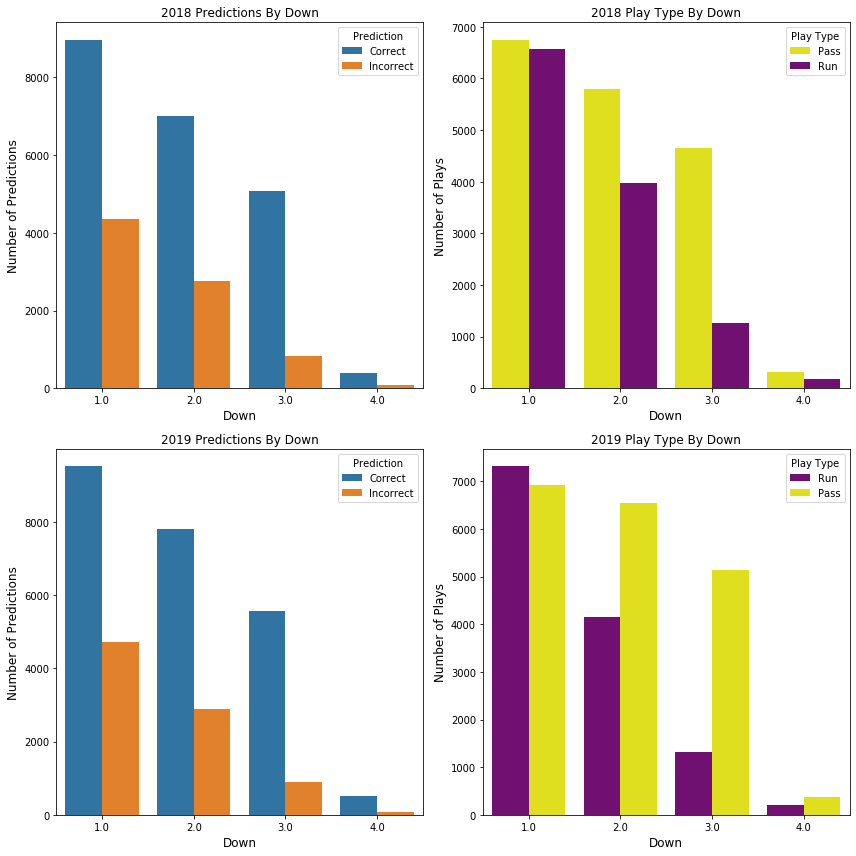

2018 Accuracy by down
1.0    0.673474
2.0    0.717313
3.0    0.859024
4.0    0.808554
Name: correct_pred, dtype: float64
2019 Accuracy by down
1.0    0.668728
2.0    0.729950
3.0    0.860814
4.0    0.862245
Name: correct_pred, dtype: float64


In [49]:
## Plot the 2018 predictions by Down

df_down_2018 = df_2018.groupby(['down']).correct_pred.value_counts()

df_down_2018 = pd.DataFrame(df_down_2018)
df_down_2018.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_down_2018.reset_index(inplace=True)
df_down_2018['Prediction'] = df_down_2018['correct_pred'].map({0 : 'Incorrect', 
                                                               1 : 'Correct'})


## plot the 2019 prediction by Down

df_down_2019 = df_2019.groupby(['down']).correct_pred.value_counts()

df_down_2019 = pd.DataFrame(df_down_2019)
df_down_2019.rename(columns={'correct_pred' : 'count'}, inplace=True)
df_down_2019.reset_index(inplace=True)
df_down_2019['Prediction'] = df_down_2019['correct_pred'].map({0 : 'Incorrect', 
                                                               1 : 'Correct'})

## Plot 2018 play distribution by down

df_play_type_down_2018 = df_2018.groupby(['down']).play_type.value_counts()

df_play_type_down_2018 = pd.DataFrame(df_play_type_down_2018)
df_play_type_down_2018.rename(columns={'play_type' : 'count'}, inplace=True)
df_play_type_down_2018.reset_index(inplace=True)
df_play_type_down_2018['Play Type'] = df_play_type_down_2018['play_type'].map({0 : 'Run', 
                                                               1 : 'Pass'})

## Plot 2019 play distribution by down

df_play_type_down_2019 = df_2019.groupby(['down']).play_type.value_counts()

df_play_type_down_2019 = pd.DataFrame(df_play_type_down_2019)
df_play_type_down_2019.rename(columns={'play_type' : 'count'}, inplace=True)
df_play_type_down_2019.reset_index(inplace=True)
df_play_type_down_2019['Play Type'] = df_play_type_down_2019['play_type'].map({0 : 'Run', 
                                                               1 : 'Pass'})

## Create subplot of both years predicted along with the distribution of plays across the downs

palette ={"Run":"purple","Pass":"yellow"}

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('2018 Predictions By Down')
sns.barplot(x='down', y= 'count', data=df_down_2018, hue='Prediction')
plt.ylabel('Number of Predictions', fontsize=12)
plt.xlabel('Down', fontsize=12)

plt.subplot(2,2,3)
plt.title('2019 Predictions By Down')
sns.barplot(x='down', y= 'count', data=df_down_2019, hue='Prediction')
plt.ylabel('Number of Predictions', fontsize=12)
plt.xlabel('Down', fontsize=12)

plt.subplot(2,2,2)
plt.title('2018 Play Type By Down')
sns.barplot(x='down', y= 'count', data=df_play_type_down_2018, hue='Play Type', palette=palette)
plt.ylabel('Number of Plays', fontsize=12)
plt.xlabel('Down', fontsize=12)

plt.subplot(2,2,4)
plt.title('2019 Play Type By Down')
sns.barplot(x='down', y= 'count', data=df_play_type_down_2019, hue='Play Type', palette=palette)
plt.ylabel('Number of Plays', fontsize=12)
plt.xlabel('Down', fontsize=12)

plt.tight_layout()
plt.show()

print('2018 Accuracy by', df_2018.groupby(['down']).correct_pred.mean())
print('2019 Accuracy by', df_2019.groupby(['down']).correct_pred.mean())

The model seems to be pretty good at predicting third down situations in relation to other downs. This is likely due to the distribution of passes is much higher than runs on third down situations.

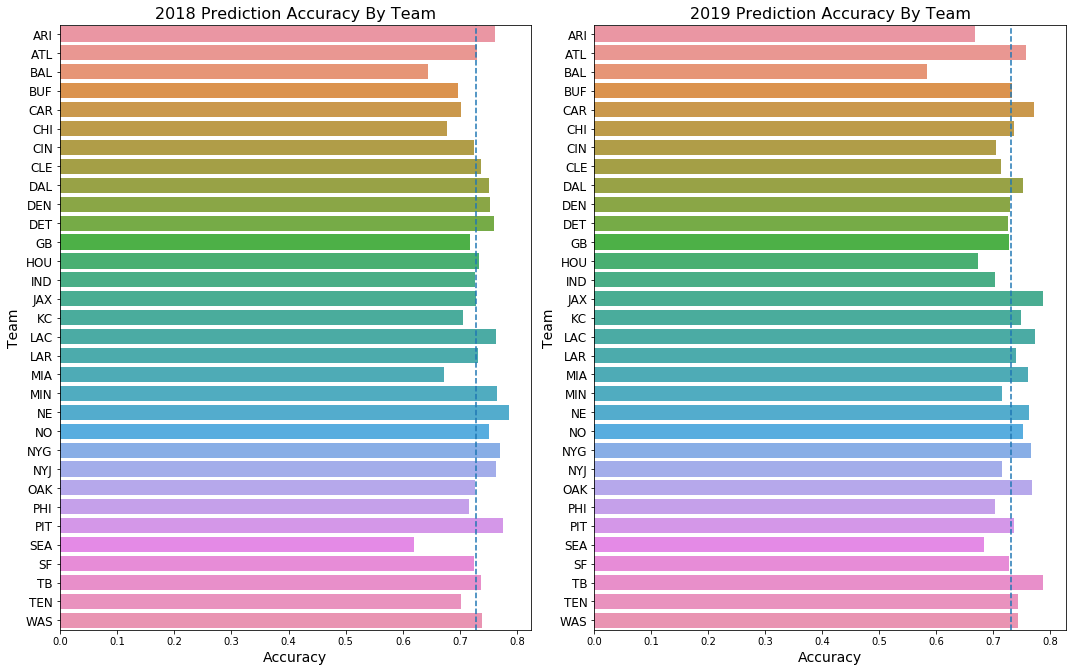

In [50]:
## Get team specific prediction accuracy by season

df_team_2018 = df_2018.groupby(['posteam']).correct_pred.mean()
accuracy_2018 = df_2018['correct_pred'].mean()
df_team_2018 = pd.DataFrame(df_team_2018)
df_team_2018.reset_index(inplace=True)

df_team_2019 = df_2019.groupby(['posteam']).correct_pred.mean()
accuracy_2019 = df_2019['correct_pred'].mean()
df_team_2019 = pd.DataFrame(df_team_2019)
df_team_2019.reset_index(inplace=True)


plt.figure(figsize=(15,18))
plt.subplot(2,2,1)
plt.title('2018 Prediction Accuracy By Team', fontsize=16)
plt.xlabel('accuracy', fontsize=14)
plt.ylabel('team', fontsize=14)
plt.yticks(fontsize=12)
ax1 = sns.barplot(x='correct_pred', y= 'posteam', data=df_team_2018)
ax1.set_xlabel('Accuracy')
ax1.set_ylabel('Team')
ax1.axvline(accuracy_2018, ls='--')


plt.subplot(2,2,2)
plt.title('2019 Prediction Accuracy By Team', fontsize=16)
plt.xlabel('accuracy', fontsize=14)
plt.ylabel('team', fontsize=14)
plt.yticks(fontsize=12)
ax2 = sns.barplot(x='correct_pred', y= 'posteam', data=df_team_2019)
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('Team')
ax2.axvline(accuracy_2019, ls='--')

plt.tight_layout()
plt.show()

In [51]:
## Find highest and lowest prediction accuracy team in 2018

df_high_low_2018 = df_team_2018.rename(columns={'posteam': 'Team', 'correct_pred': 'Prediction Accuracy'})
df_high_low_2018.sort_values('Prediction Accuracy', ascending=False).iloc[[0,-1]].round(5)


,Team,Prediction Accuracy
20,NE,0.78491
27,SEA,0.61967


Very interesting to see the New England Patriots as the most predictible team. They were the most successful team during the 2018 season as they won the Super Bowl.

In [52]:
## Find highest and lowest prediction accuracy team in 2019

df_high_low_2019 = df_team_2019.rename(columns={'posteam': 'Team', 'correct_pred': 'Prediction Accuracy'})
df_high_low_2019.sort_values('Prediction Accuracy', ascending=False).iloc[[0,-1]].round(5)


,Team,Prediction Accuracy
29,TB,0.78814
2,BAL,0.58341


Again 2019 shows very interesting results. This time the best team during the regular season, the Baltimore Ravens were the least predictable team during the 2019 season. They dominated throughout the season adn had 14 wins and 2 losses. Meanwhile the most predictable team was the Buccaneers who where a below average team in 2019.

In [54]:
## Find out feature importance of my model

feat_names = df_2018.columns[4:18]
feat_importance = model.feature_importances_

feat_dict = {'Feature Names' : feat_names,
             'Feature Importance': feat_importance}
df_features = pd.DataFrame(feat_dict, columns=['Feature Names', 'Feature Importance' ])
df_features.sort_values(by=['Feature Importance'], ascending=False)

,Feature Names,Feature Importance
9,shotgun,0.746916
6,down,0.067203
7,ydstogo,0.039621
5,qtr,0.036876
8,score_differential,0.017726
11,posteam_timeouts_remaining,0.013527
13,field_goal_range,0.013219
12,defteam_timeouts_remaining,0.011944
4,quarter_seconds_remaining,0.011933
2,yardline_100,0.009798


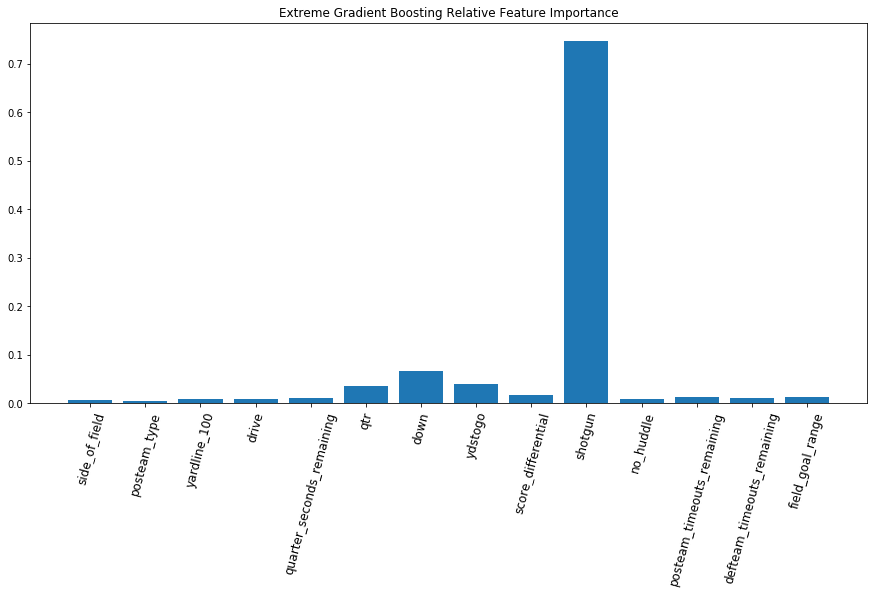

In [55]:
plt.figure(figsize=(15,7))
plt.bar(df_features['Feature Names'], df_features['Feature Importance'])
plt.title('Extreme Gradient Boosting Relative Feature Importance')
plt.xticks(rotation=75, fontsize=12)
plt.show()

This model is quite intuitive as it classified shotgun formation as the most important feature by far. Shotgun is commonly used across the NFL and is typical when a team plans on throwing the ball. More information about this formation can be found at https://en.wikipedia.org/wiki/Shotgun_formation

In [56]:
## Frequency of offensive play calls starting in shotgun formation

print('Percentage of plays starting in shotgun formation during 2018 season was', df_2018['shotgun'].mean().round(3))
print('Percentage of plays starting in shotgun formation during 2019 season was', df_2019['shotgun'].mean().round(3))

Percentage of plays starting in shotgun formation during 2018 season was 0.635
Percentage of plays starting in shotgun formation during 2019 season was 0.645


Shotgun formation occured consistently across both 2018 and 2019 seasons occuring 63.5% and 64.5% of all offensive plays respectively.

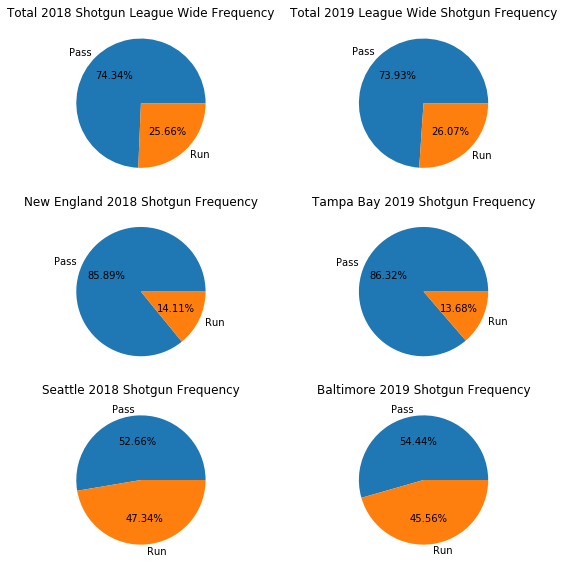

In [68]:
## Plot out play frequencies when in shotgun formation

## 2018 season

ne_shotgun_2018 = df_2018[(df_2018['posteam'] == 'NE') & df_2018['shotgun'] == 1]
ne_play_freq_2018 = ne_shotgun_2018['play_type'].value_counts()

sea_shotgun_2018 = df_2018[(df_2018['posteam'] == 'SEA') & df_2018['shotgun'] == 1]
sea_play_freq_2018 = sea_shotgun_2018['play_type'].value_counts()

df_shotgun_2018_total = df_2018[df_2018['shotgun'] == 1]
df_shotgun_2018_total = df_shotgun_2018_total['play_type'].value_counts()

## 2019 season

bal_shotgun_2019 = df_2019[(df_2019['posteam'] == 'BAL') & df_2019['shotgun'] == 1]
bal_shotgun_2019 = bal_shotgun_2019['play_type'].value_counts()

tb_shotgun_2019 = df_2019[(df_2019['posteam'] == 'TB') & df_2019['shotgun'] == 1]
tb_shotgun_2019 = tb_shotgun_2019['play_type'].value_counts()

df_shotgun_2019_total = df_2019[df_2019['shotgun'] == 1]
df_shotgun_2019_total = df_shotgun_2019_total['play_type'].value_counts()

## Subplot the results

plt.figure(figsize =(8,8))
plt.subplot(3,2,1)
plt.pie(df_shotgun_2018_total, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Total 2018 Shotgun League Wide Frequency', fontsize=12)

plt.subplot(3,2,3)
plt.pie(ne_play_freq_2018, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('New England 2018 Shotgun Frequency', fontsize=12)


plt.subplot(3,2,5)
plt.pie(sea_play_freq_2018, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Seattle 2018 Shotgun Frequency', fontsize=12)

plt.subplot(3,2,2)
plt.pie(df_shotgun_2019_total, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Total 2019 League Wide Shotgun Frequency', fontsize=12)

plt.subplot(3,2,4)
plt.pie(tb_shotgun_2019, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Tampa Bay 2019 Shotgun Frequency', fontsize=12)

plt.subplot(3,2,6)
plt.pie(bal_shotgun_2019, labels= ('Pass', 'Run'), autopct='%.2f%%')
plt.title('Baltimore 2019 Shotgun Frequency', fontsize=12)

plt.tight_layout()
plt.show()


No suprise. The most predictible teams in both seasons passed the ball in shotgun formation at a high frequency, while the least predictible teams were mixing up their play calling when lining up in shotgun formation.

In [81]:
## Additional analysis on the 2019 Baltimore Ravens

ravens = df_2019[(df_2019['posteam'] == 'BAL')]
print('The Baltimore ravens used shotgun formation on', (ravens.shotgun.mean().round(4)* 100), 'percent of their plays during the 2019 season')

The Baltimore ravens used shotgun formation on 95.47 percent of their plays during the 2019 season


In [83]:
## Check ravens passing %

ravens.play_type.mean()

0.4493731918997107

I am suprised to see the Ravens only passed the ball ~45% of the time throughout the 2019 season.

In [93]:
## Check play types accross the 32 teams in the NFL 2019

df_play_type_team_2019 = df_2019.groupby(['posteam']).play_type.mean()
df_play_type_team_2019 = pd.DataFrame(df_play_type_team_2019)

df_play_type_team_2019.sort_values(by='play_type', ascending=False)

,play_type
posteam,
ATL,0.675626
MIA,0.663033
NYG,0.645129
CAR,0.643258
LAC,0.635066
CIN,0.633625
TB,0.629002
LAR,0.625602
JAX,0.625249


Very interesting. The Baltimore Raven were the only team in the NFL during the 2019 season to run the ball more frquently that pass. They did this despite starting in shotgun formation 95% of the time. All things considered this really made the Ravens unpredictible, and likely lead to them having a really successful regular season.

In [94]:
## Check play types accross the 32 teams in the NFL 2018

df_play_type_team_2018 = df_2018.groupby(['posteam']).play_type.mean()
df_play_type_team_2018 = pd.DataFrame(df_play_type_team_2018)


df_play_type_team_2018.sort_values(by='play_type', ascending=False)

,play_type
posteam,
ATL,0.668416
PIT,0.662513
GB,0.660236
MIN,0.653802
NYG,0.647514
TB,0.632549
PHI,0.629118
OAK,0.628821
IND,0.628780


Another interesting result. The Seahwks during the 2018 season were the only team in the NFL to run more frequently than pass and they also were the least predictible team.

In [97]:
## Check frequency of shotgun formation in play calling

seahawks = df_2018[(df_2018['posteam'] == 'SEA')]
print('The Seattle Seahwaks used shotgun formation on', (seahawks.shotgun.mean().round(4)* 100), 'percent of their plays during the 2018 season')

The Seattle Seahwaks used shotgun formation on 69.73 percent of their plays during the 2018 season


Unlike the Ravens a season later, the Seahawks were much closer to the league average using shotgun ~70% of the time. It appears that are less predictible teams run the ball more often than pass, and split their play calls in shotgun formation between passing and running nearly evenly.